

# **Data Preprocessing**

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
path= '/content/drive/MyDrive/Colab Notebooks/Deep Learning Model/Sales.csv'
path1= '/content/drive/MyDrive/geography.csv'
path2= '/content/drive/MyDrive/product.csv'

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path)
df_geo = pd.read_csv(path1)
df_product=pd.read_csv(path2)


In [166]:
df.info()
df_geo.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976243 entries, 0 to 976242
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductID  976243 non-null  int64 
 1   Date       976243 non-null  object
 2   Zip        976243 non-null  int64 
 3   Units      976243 non-null  int64 
 4   Revenue    976202 non-null  object
 5   COGS       976243 non-null  object
dtypes: int64(3), object(3)
memory usage: 44.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Zip       39948 non-null  int64 
 1   City      39948 non-null  object
 2   State     39948 non-null  object
 3   Region    39948 non-null  object
 4   District  39948 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 4

In [167]:
df["Date"] = pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['COGS'] = df['COGS'].astype(str)
df['COGS'] = (df['COGS']
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df['Revenue']  = (df['Revenue']
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df = df.sort_values(by="Date")


In [168]:
df

ProductID       Date    Zip  Units   Revenue      COGS  Year  Month  \
147011        676 2010-07-04   8075      1  10048.50   9342.09  2010      7   
330167       1041 2010-07-04  56334      1  11651.85   5941.28  2010      7   
362065       1318 2010-07-04  92675      1   3873.24   1991.62  2010      7   
189287        580 2010-07-04  54547      1   9418.50  10174.81  2010      7   
446302       1895 2010-07-04  92354      1   9134.37   9209.27  2010      7   
...           ...        ...    ...    ...       ...       ...   ...    ...   
201907       2269 2022-07-01  21012      1   4718.70   4511.55  2022      7   
324302        668 2022-07-01  37129      1  16946.37  12831.79  2022      7   
465416       2224 2022-07-01  84414      1    970.20    559.81  2022      7   
823105       2393 2022-07-01  60449      1   1259.37   1371.71  2022      7   
256617        567 2022-07-01  44301      1  10236.87   8799.61  2022      7   

        Day  
147011    4  
330167    4  
362065    4  
189287    4  
446302    4  
...     ...  
201907    1  
324302    1  
465416    1  
823105    1  
256617    1  

[976243 rows x 9 columns]

In [169]:
missing_values = df.isnull().sum()
print("S·ªë l∆∞·ª£ng gi√° tr·ªã null trong t·ª´ng c·ªôt:")
print(missing_values)

S·ªë l∆∞·ª£ng gi√° tr·ªã null trong t·ª´ng c·ªôt:
ProductID     0
Date          0
Zip           0
Units         0
Revenue      41
COGS          0
Year          0
Month         0
Day           0
dtype: int64


In [170]:
df[df['Revenue'].isnull()]


ProductID       Date    Zip  Units  Revenue  COGS  Year  Month  Day
333237        912 2022-06-07  68521      1      NaN   0.0  2022      6    7
337461        720 2022-06-14  29063      1      NaN   0.0  2022      6   14
336181       2266 2022-06-14  89135      1      NaN   0.0  2022      6   14
338503       2267 2022-06-14  89135      1      NaN   0.0  2022      6   14
333994        719 2022-06-14  29063      1      NaN   0.0  2022      6   14
333533       1542 2022-06-17  92086      1      NaN   0.0  2022      6   17
338489       2302 2022-06-17  92128      1      NaN   0.0  2022      6   17
336177       1541 2022-06-17  92086      1      NaN   0.0  2022      6   17
333052       2302 2022-06-17  89044      1      NaN   0.0  2022      6   17
337767       2302 2022-06-19  85303      1      NaN   0.0  2022      6   19
336235       2302 2022-06-19  85749      1      NaN   0.0  2022      6   19
333943        912 2022-06-19  94510      1      NaN   0.0  2022      6   19
337575       1176 2022-06-20  33056      1      NaN   0.0  2022      6   20
335496       2302 2022-06-21  98229      1      NaN   0.0  2022      6   21
334089       2208 2022-06-22  96161      1      NaN   0.0  2022      6   22
338862       2209 2022-06-22  96161      1      NaN   0.0  2022      6   22
334368        912 2022-06-24  92648      1      NaN   0.0  2022      6   24
334985        917 2022-06-25  23509      1      NaN   0.0  2022      6   25
334508       2208 2022-06-25  92805      1      NaN   0.0  2022      6   25
333126       2209 2022-06-25  92805      1      NaN   0.0  2022      6   25
337764        673 2022-06-26  60616      1      NaN   0.0  2022      6   26
334128       2302 2022-06-26  28460      1      NaN   0.0  2022      6   26
333731       1835 2022-06-26  60608      1      NaN   0.0  2022      6   26
334402       1835 2022-06-27  97034      1      NaN   0.0  2022      6   27
334968        919 2022-06-27  29206      1      NaN   0.0  2022      6   27
338221        920 2022-06-28  22314      1      NaN   0.0  2022      6   28
336158        845 2022-06-28  92345      1      NaN   0.0  2022      6   28
333890       2302 2022-06-28  80031      1      NaN   0.0  2022      6   28
333545        919 2022-06-28  94085      1      NaN   0.0  2022      6   28
336960        912 2022-06-29  97403      1      NaN   0.0  2022      6   29
333543       2302 2022-06-29  34758      1      NaN   0.0  2022      6   29
337917       2302 2022-06-29  53005      1      NaN   0.0  2022      6   29
334662        673 2022-06-29   7719      1      NaN   0.0  2022      6   29
336941        845 2022-07-01  95377      1      NaN   0.0  2022      7    1
337941        673 2022-07-01  19007      1      NaN   0.0  2022      7    1
335057       2302 2022-07-01  82902      1      NaN   0.0  2022      7    1
334051        845 2022-07-01  15237      1      NaN   0.0  2022      7    1
335323        912 2022-07-01  34212      1      NaN   0.0  2022      7    1
319629       2197 2022-07-01   6379      1      NaN   0.0  2022      7    1
333337       2302 2022-07-01  98629      1      NaN   0.0  2022      7    1
338889       2302 2022-07-01  92117      1      NaN   0.0  2022      7    1

In [171]:
df_cleaned = df.dropna(subset=['Revenue'])



In [172]:
df=df_cleaned

In [173]:
df

ProductID       Date    Zip  Units   Revenue      COGS  Year  Month  \
147011        676 2010-07-04   8075      1  10048.50   9342.09  2010      7   
330167       1041 2010-07-04  56334      1  11651.85   5941.28  2010      7   
362065       1318 2010-07-04  92675      1   3873.24   1991.62  2010      7   
189287        580 2010-07-04  54547      1   9418.50  10174.81  2010      7   
446302       1895 2010-07-04  92354      1   9134.37   9209.27  2010      7   
...           ...        ...    ...    ...       ...       ...   ...    ...   
201907       2269 2022-07-01  21012      1   4718.70   4511.55  2022      7   
324302        668 2022-07-01  37129      1  16946.37  12831.79  2022      7   
465416       2224 2022-07-01  84414      1    970.20    559.81  2022      7   
823105       2393 2022-07-01  60449      1   1259.37   1371.71  2022      7   
256617        567 2022-07-01  44301      1  10236.87   8799.61  2022      7   

        Day  
147011    4  
330167    4  
362065    4  
189287    4  
446302    4  
...     ...  
201907    1  
324302    1  
465416    1  
823105    1  
256617    1  

[976202 rows x 9 columns]

In [174]:
# Nh√≥m doanh thu theo th√°ng
df['Year-Month'] = df['Date'].dt.to_period('M')
df_monthly_revenue = df.groupby('Year-Month')['Revenue'].sum().reset_index()

# Chuy·ªÉn Year-Month v·ªÅ datetime ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
df_monthly_revenue['Year-Month'] = df_monthly_revenue['Year-Month'].astype(str)
df_monthly_revenue['Year-Month'] = pd.to_datetime(df_monthly_revenue['Year-Month'])

# T√≠nh s·ª± kh√°c bi·ªát doanh thu gi·ªØa c√°c th√°ng
df_monthly_revenue['diff'] = df_monthly_revenue['Revenue'].diff()


<ipython-input-174-8fa670ea73cc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **EDA**

In [175]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
df['Profit'] = df['Revenue'] - df['COGS']

<ipython-input-176-24aef6e7bfb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
full_df = df.merge(df_product, on='ProductID', how='left')
full_df = full_df.merge(df_geo, on='Zip', how='left')
full_df['District'] = full_df['District'].astype(str).str[:2]
full_df['Year'] = full_df['Date'].dt.year
full_df['Month'] = full_df['Date'].dt.month

seg_cat_year = full_df.groupby(['Year', 'Segment', 'Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units': 'sum'
}).reset_index()

print("\nT·ªïng h·ª£p Revenue v√† Profit theo Year - Segment - Category:")
print(seg_cat_year.head(15))



T·ªïng h·ª£p Revenue v√† Profit theo Year - Segment - Category:
    Year       Segment Category       Revenue       Profit  Units
0   2010    All Season      Mix  3.279820e+06    477176.74    813
1   2010   Convenience    Urban  7.820872e+07  16245922.57  11039
2   2010       Extreme    Urban  2.191555e+07   3124043.88   3876
3   2010    Moderation    Urban  5.519724e+07   9417894.30   5029
4   2010  Productivity    Rural  3.857243e+07   8004113.09  22764
5   2010       Regular    Urban  3.409100e+06    763237.25    785
6   2010        Select    Rural  7.184241e+06   1071994.20   2361
7   2010         Youth    Youth  2.669358e+06    533624.59   1757
8   2011    All Season      Mix  8.337038e+06   1234178.15   2032
9   2011   Convenience    Urban  2.023497e+08  40878060.07  29161
10  2011       Extreme    Urban  6.715094e+07  10742065.39  12001
11  2011    Moderation    Urban  1.254125e+08  19672831.91  11427
12  2011  Productivity    Rural  8.506944e+07  16213522.49  48242
13  2011   

##1.Bi·ªÉu ƒë·ªì doanh thu v√† l·ª£i nhu·∫≠n cho th·∫•y s·ª± ph√¢n h√≥a r√µ r·ªát gi·ªØa hai nh√≥m

*   Nh√≥m d·∫´n ƒë·∫ßu: Moderation v√† Convenience chi·∫øm ∆∞u th·∫ø.
*   Nh√≥m c√≤n l·∫°i: Extreme, All season, Productivity, Regular, Select, Youth c√≥ m·ª©c doanh thu v√† l·ª£i nhu·∫≠n th·∫•p h∆°n ƒë√°ng k·ªÉ.


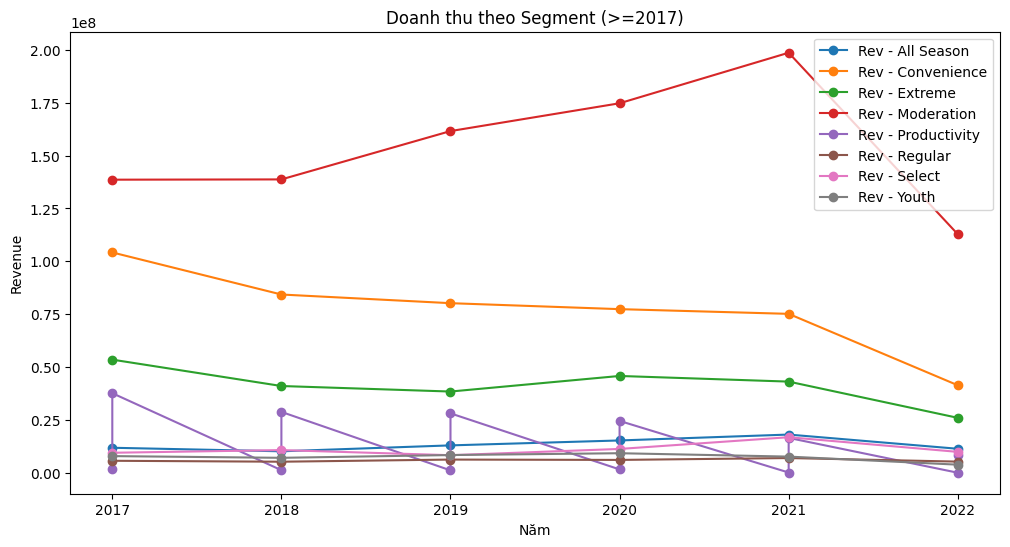

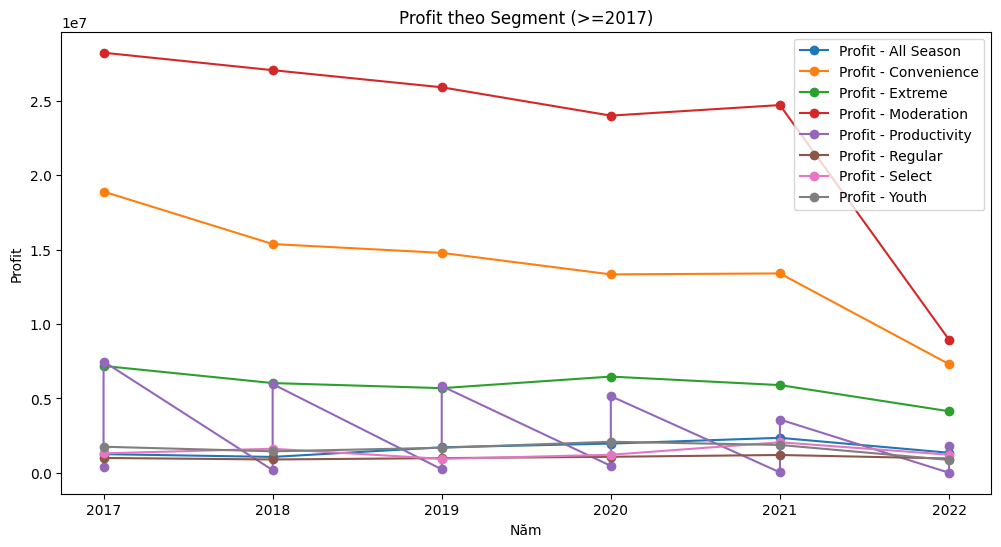

In [178]:
# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng cho t·ª´ng Segment/Category ƒë·ªÉ so s√°nh tr∆∞·ªõc v√† sau 2017
# L·ªçc d·ªØ li·ªáu sau 2017
seg_cat_post2017 = seg_cat_year[seg_cat_year['Year'] >= 2017]

# V·∫Ω bi·ªÉu ƒë·ªì cho t·ª´ng ph√¢n nh√≥m (ch·ªâ l·∫•y v√≠ d·ª• cho m·ªôt v√†i ph√¢n kh√∫c)
plt.figure(figsize=(12,6))
for seg in seg_cat_post2017['Segment'].unique():
    subset = seg_cat_post2017[seg_cat_post2017['Segment'] == seg]
    plt.plot(subset['Year'], subset['Revenue'], marker='o', label=f'Rev - {seg}')
plt.title("Doanh thu theo Segment (>=2017)")
plt.xlabel("NƒÉm")
plt.ylabel("Revenue")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for seg in seg_cat_post2017['Segment'].unique():
    subset = seg_cat_post2017[seg_cat_post2017['Segment'] == seg]
    plt.plot(subset['Year'], subset['Profit'], marker='o', label=f'Profit - {seg}')
plt.title("Profit theo Segment (>=2017)")
plt.xlabel("NƒÉm")
plt.ylabel("Profit")
plt.legend()
plt.show()


T·ªïng h·ª£p cho c√°c Category: youth, rural, urban:
    Year Category       Revenue       Profit  Units
0   2010    Rural  4.575667e+07   9076107.29  25125
1   2010    Urban  1.587306e+08  29551098.00  20729
2   2010    Youth  2.669358e+06    533624.59   1757
3   2011    Rural  1.002703e+08  18778290.57  53268
4   2011    Urban  4.033813e+08  73147985.05  54398
5   2011    Youth  7.912954e+06   1662513.90   4481
6   2012    Rural  1.036868e+08  20098823.86  52219
7   2012    Urban  4.290307e+08  76783132.59  58311
8   2012    Youth  8.644590e+06   1820854.40   4656
9   2013    Rural  1.038068e+08  22251575.74  48977
10  2013    Urban  4.674669e+08  82680613.43  62747
11  2013    Youth  1.117675e+07   2553816.13   5517
12  2014    Rural  9.718355e+07  20113918.60  42569
13  2014    Urban  5.121567e+08  85449629.47  66692
14  2014    Youth  1.198104e+07   2699444.03   5291
15  2015    Rural  9.197124e+07  18124764.01  36528
16  2015    Urban  4.926893e+08  86874052.57  63503
17  2015  

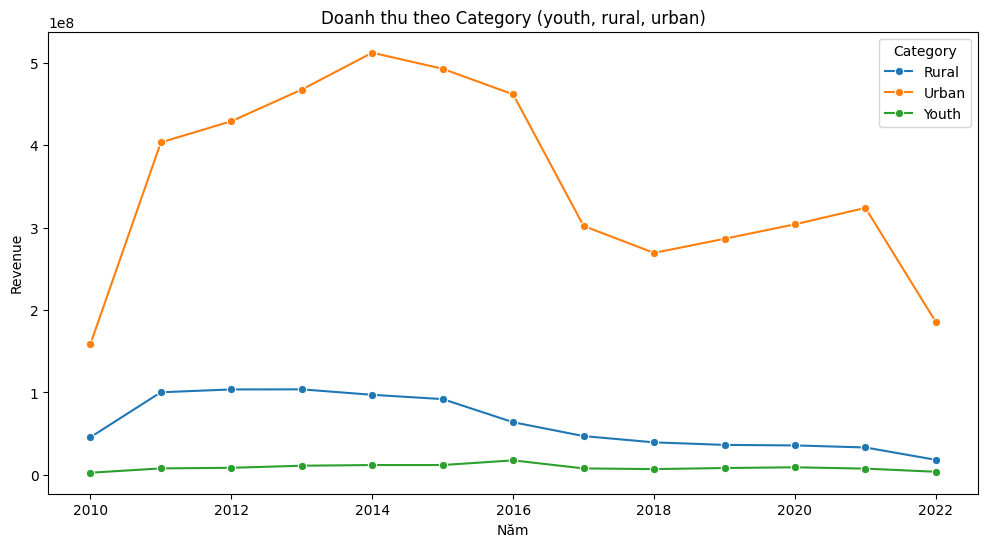

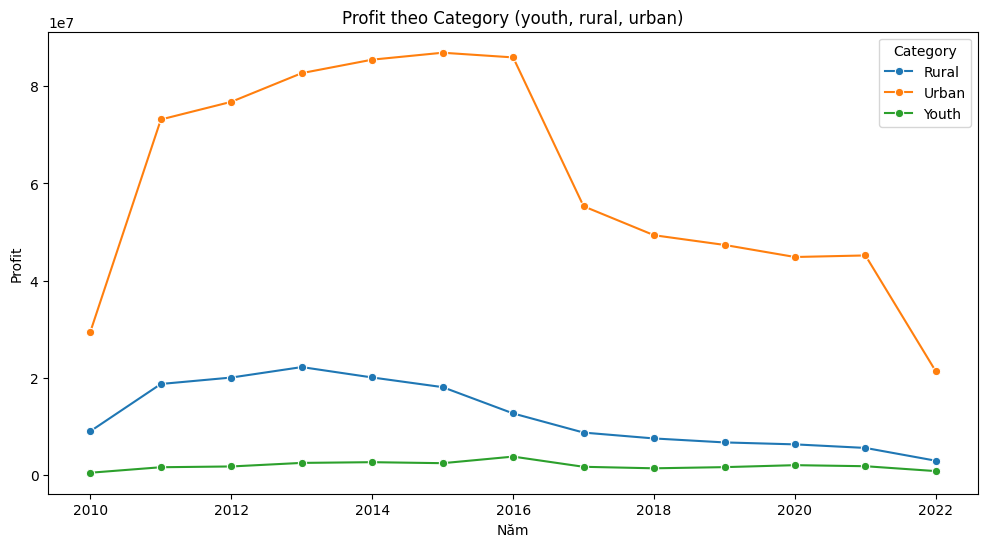

In [179]:
# 2.3. So s√°nh c√°c nh√≥m "youth", "rural", "urban"
if full_df['Category'].str.lower().isin(['youth', 'rural', 'urban']).any():
    specific_cat = full_df[full_df['Category'].str.lower().isin(['youth', 'rural', 'urban'])]
    specific_summary = specific_cat.groupby(['Year', 'Category']).agg({
        'Revenue': 'sum',
        'Profit': 'sum',
        'Units': 'sum'
    }).reset_index()
    print("\nT·ªïng h·ª£p cho c√°c Category: youth, rural, urban:")
    print(specific_summary)

    plt.figure(figsize=(12,6))
    sns.lineplot(data=specific_summary, x='Year', y='Revenue', hue='Category', marker='o')
    plt.title("Doanh thu theo Category (youth, rural, urban)")
    plt.xlabel("NƒÉm")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.lineplot(data=specific_summary, x='Year', y='Profit', hue='Category', marker='o')
    plt.title("Profit theo Category (youth, rural, urban)")
    plt.xlabel("NƒÉm")
    plt.ylabel("Profit")
    plt.show()

##2.Ph√¢n t√≠ch s·∫£n ph·∫©m bi·∫øn m·∫•t / suy gi·∫£m hi·ªáu su·∫•t ƒë·ªôt ng·ªôt

In [180]:
# PH·∫¶N 3: PH√ÇN T√çCH S·∫¢N PH·∫®M BI·∫æN M·∫§T / GI·∫¢M HI·ªÜU SU·∫§T ƒê·ªòT NG·ªòT
# T√≠nh s·ªë l∆∞·ª£ng giao d·ªãch (ho·∫∑c s·ªë l·∫ßn b√°n) c·ªßa t·ª´ng s·∫£n ph·∫©m theo nƒÉm
product_year = full_df.groupby(['Year', 'ProductID']).agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

# T√¨m nh·ªØng s·∫£n ph·∫©m c√≥ s·ªë l∆∞·ª£ng giao d·ªãch gi·∫£m ƒë·ªôt ng·ªôt sau 2017 so v·ªõi tr∆∞·ªõc ƒë√≥
# T√≠nh trung b√¨nh Units c·ªßa t·ª´ng s·∫£n ph·∫©m tr∆∞·ªõc 2017 v√† sau 2017
pre2017 = product_year[product_year['Year'] < 2017].groupby('ProductID')['Units'].mean().reset_index().rename(columns={'Units': 'Units_pre2017'})
post2017 = product_year[product_year['Year'] >= 2017].groupby('ProductID')['Units'].mean().reset_index().rename(columns={'Units': 'Units_post2017'})
prod_compare = pd.merge(pre2017, post2017, on='ProductID', how='inner')

# T√≠nh t·ªâ l·ªá gi·∫£m c·ªßa Units (n·∫øu gi·∫£m > 50% th√¨ ƒë√°nh d·∫•u l√† gi·∫£m m·∫°nh)
prod_compare['Reduction_Rate'] = (prod_compare['Units_pre2017'] - prod_compare['Units_post2017']) / prod_compare['Units_pre2017']
print("\nS·∫£n ph·∫©m c√≥ s·ª± gi·∫£m s·ªë l∆∞·ª£ng b√°n (Units) > 50%:")
print(prod_compare[prod_compare['Reduction_Rate'] > 0.5])


S·∫£n ph·∫©m c√≥ s·ª± gi·∫£m s·ªë l∆∞·ª£ng b√°n (Units) > 50%:
     ProductID  Units_pre2017  Units_post2017  Reduction_Rate
6           38      28.500000        1.666667        0.941520
7           40       7.000000        2.000000        0.714286
8           42       6.000000        2.000000        0.666667
9           89      12.000000        1.000000        0.916667
10          92      82.571429        1.000000        0.987889
..         ...            ...             ...             ...
746       2400     204.285714        1.000000        0.995105
747       2402     174.800000       36.000000        0.794050
748       2404      52.500000        2.500000        0.952381
750       2407      11.500000        3.000000        0.739130
752       2412     264.500000       75.333333        0.715186

[577 rows x 4 columns]


3.Ph√¢n t√≠ch COGS v√† c·∫•u tr√∫c gi√°


So s√°nh Revenue v√† COGS theo NƒÉm:
    Year       Revenue          COGS  Cost_to_Revenue
0   2010  2.104365e+08  1.707985e+08         0.811639
1   2011  5.199015e+08  4.250786e+08         0.817614
2   2012  5.508145e+08  4.510869e+08         0.818945
3   2013  5.942496e+08  4.856279e+08         0.817212
4   2014  6.356110e+08  5.260177e+08         0.827578
5   2015  6.124530e+08  5.036523e+08         0.822352
6   2016  5.640998e+08  4.593387e+08         0.814286
7   2017  3.704278e+08  3.029221e+08         0.817763
8   2018  3.272709e+08  2.676449e+08         0.817809
9   2019  3.453526e+08  2.875985e+08         0.832768
10  2020  3.659085e+08  3.101526e+08         0.847623
11  2021  3.830445e+08  3.279625e+08         0.856199
12  2022  2.189537e+08  1.923882e+08         0.878671


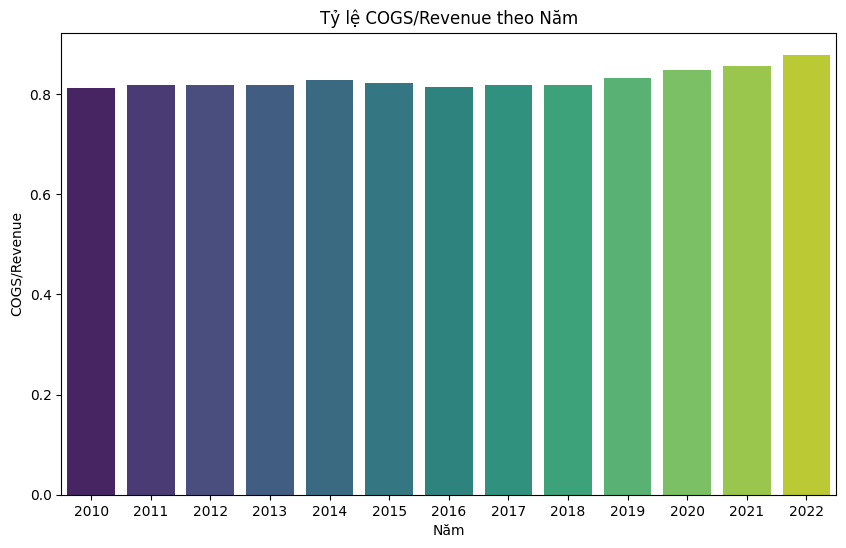

In [181]:
# PH·∫¶N 4: PH√ÇN T√çCH COGS V√Ä C·∫§U TR√öC GI√Å
# T·ªïng h·ª£p doanh thu v√† COGS theo nƒÉm
yearly_cost = full_df.groupby('Year').agg({
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

yearly_cost['Cost_to_Revenue'] = yearly_cost['COGS'] / yearly_cost['Revenue']
print("\nSo s√°nh Revenue v√† COGS theo NƒÉm:")
print(yearly_cost)

plt.figure(figsize=(10,6))
sns.barplot(data=yearly_cost, x='Year', y='Cost_to_Revenue', palette="viridis")
plt.title("T·ª∑ l·ªá COGS/Revenue theo NƒÉm")
plt.xlabel("NƒÉm")
plt.ylabel("COGS/Revenue")
plt.show()

## 3.Ph√¢n c·ª•m c√°c s·∫£n ph·∫©m d·ª±a tr√™n m·ªëi quan h·ªá gi·ªØa T·ªïng doanh thu v√† T·ªïng l·ª£i nhu·∫≠n


K·∫øt qu·∫£ clustering s·∫£n ph·∫©m:
   ProductID  Units      Revenue     Profit  Cluster
0          1     64    316512.00  141607.68        2
1          3    971  10517267.25 -827706.85        2
2          4    207   1989426.60  829391.25        2
3          5      2     17892.00    -710.32        2
4          7     36    191051.91   63830.33        2


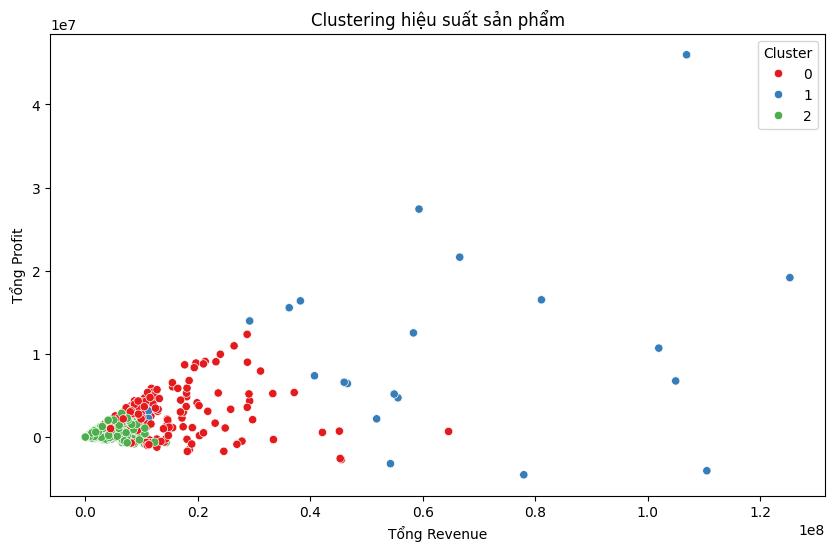

In [182]:
from sklearn.cluster import KMeans # Importing the KMeans class from sklearn.cluster

# PH·∫¶N 5: PH√ÇN T√çCH S·ªê L∆Ø·ª¢NG B√ÅN RA (Units) & CLUSTERING
# -----------------------------
# T√≥m t·∫Øt hi·ªáu su·∫•t b√°n h√†ng theo s·∫£n ph·∫©m
prod_perf = full_df.groupby('ProductID').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

from sklearn.preprocessing import StandardScaler
# Chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ clustering
scaler = StandardScaler()
features = prod_perf[['Units', 'Revenue', 'Profit']]
features_scaled = scaler.fit_transform(features)

# S·ª≠ d·ª•ng KMeans ƒë·ªÉ ph√¢n nh√≥m s·∫£n ph·∫©m (v√≠ d·ª• 3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
prod_perf['Cluster'] = kmeans.fit_predict(features_scaled)

print("\nK·∫øt qu·∫£ clustering s·∫£n ph·∫©m:")
print(prod_perf.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=prod_perf, x='Revenue', y='Profit', hue='Cluster', palette='Set1')
plt.title("Clustering hi·ªáu su·∫•t s·∫£n ph·∫©m")
plt.xlabel("T·ªïng Revenue")
plt.ylabel("T·ªïng Profit")
plt.show()

##4.·∫¢nh h∆∞·ªüng c·ªßa khu v·ª±c ƒë·∫øn doanh thu: Doanh s·ªë t·∫°i CA t√°c ƒë·ªông ƒë√°ng k·ªÉ ƒë·∫øn t·ªïng doanh thu.

In [183]:
df = df.merge(df_geo[['Zip', 'State']], on='Zip', how='left')

num_states = df['State'].nunique()
print(f"S·ªë l∆∞·ª£ng bang trong d·ªØ li·ªáu: {num_states}")

# Danh s√°ch c√°c bang
states_list = df['State'].unique()
print("Danh s√°ch c√°c bang:", states_list)


S·ªë l∆∞·ª£ng bang trong d·ªØ li·ªáu: 49
Danh s√°ch c√°c bang: ['NJ' 'MN' 'CA' 'WI' 'OH' 'IL' 'KS' 'PA' 'AL' 'IA' 'TX' 'VA' 'WV' 'AZ'
 'RI' 'AR' 'WA' 'MO' 'GA' 'IN' 'NY' 'MI' 'MA' 'VT' 'FL' 'DC' 'NV' 'SC'
 'AK' 'DE' 'LA' 'NM' 'NC' 'CO' 'UT' 'KY' 'OK' 'TN' 'SD' 'CT' 'OR' 'ND'
 'MS' 'WY' 'MD' 'ID' 'NE' 'MT' 'NH']


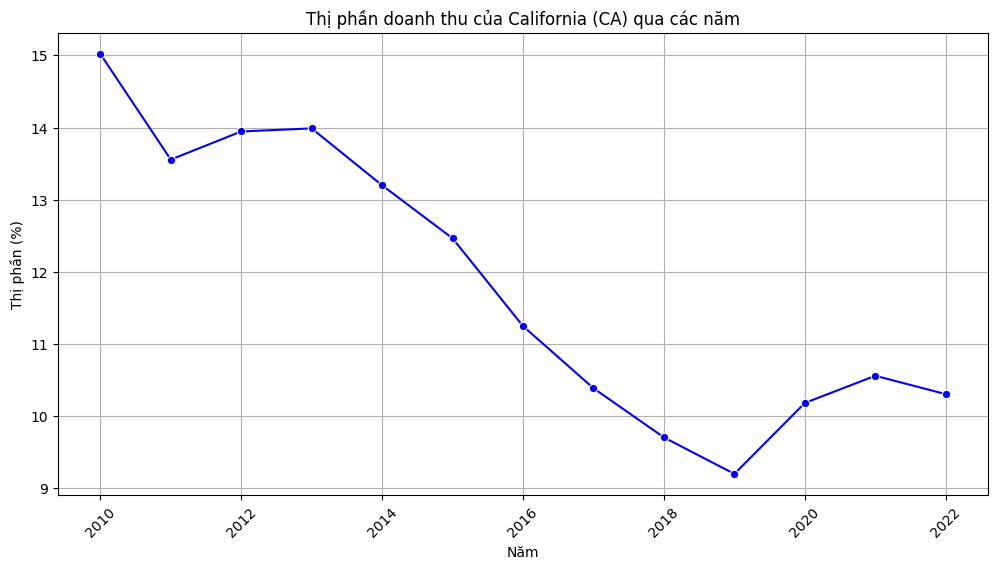

In [184]:
# T√≠nh t·ªïng doanh thu m·ªói nƒÉm
df_yearly = df.groupby("Year")["Revenue"].sum().reset_index().rename(columns={"Revenue": "Total_Revenue"})

# T√≠nh t·ªïng doanh thu c·ªßa bang CA theo t·ª´ng nƒÉm
df_ca_yearly = df[df["State"] == "CA"].groupby("Year")["Revenue"].sum().reset_index().rename(columns={"Revenue": "CA_Revenue"})

# K·∫øt h·ª£p hai b·∫£ng ƒë·ªÉ t√≠nh th·ªã ph·∫ßn
df_ca_market_share = df_ca_yearly.merge(df_yearly, on="Year")
df_ca_market_share["Market_Share"] = df_ca_market_share["CA_Revenue"] / df_ca_market_share["Total_Revenue"] * 100

# V·∫Ω bi·ªÉu ƒë·ªì th·ªã ph·∫ßn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ca_market_share, x="Year", y="Market_Share", marker="o", color="blue")

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title("Th·ªã ph·∫ßn doanh thu c·ªßa California (CA) qua c√°c nƒÉm")
plt.xlabel("NƒÉm")
plt.ylabel("Th·ªã ph·∫ßn (%)")
plt.xticks(rotation=45)
plt.grid()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

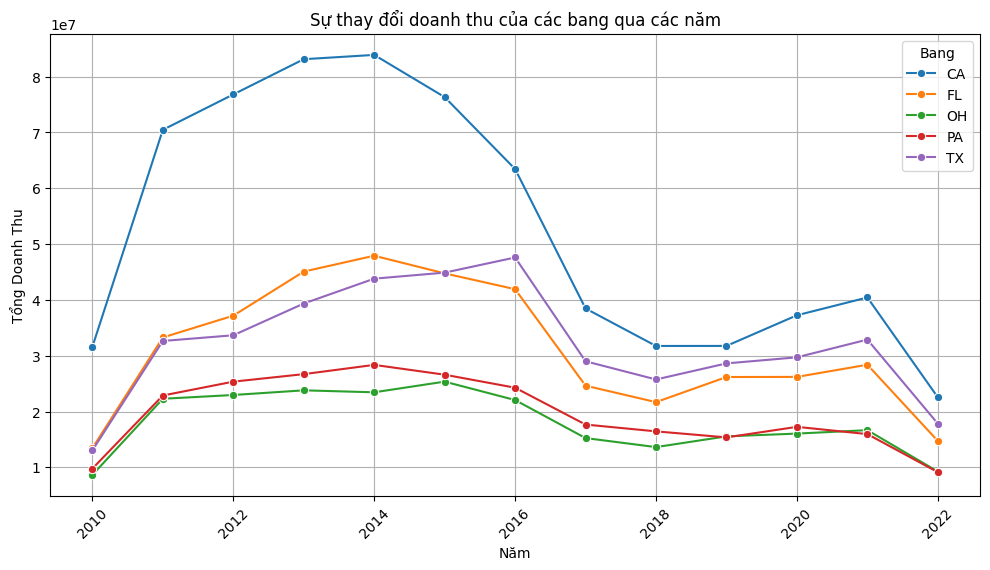

In [185]:
# Nh√≥m d·ªØ li·ªáu theo State v√† Year, t√≠nh t·ªïng doanh thu
df_state_yearly = df.groupby(["State", "Year"])["Revenue"].sum().reset_index()

# Ch·ªçn m·ªôt s·ªë bang c√≥ doanh thu cao nh·∫•t ƒë·ªÉ v·∫Ω (v√≠ d·ª•: top 5)
top_states = df_state_yearly.groupby("State")["Revenue"].sum().nlargest(5).index

# L·ªçc d·ªØ li·ªáu ch·ªâ l·∫•y c√°c bang n·∫±m trong top 5
df_top_states = df_state_yearly[df_state_yearly["State"].isin(top_states)]

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_states, x="Year", y="Revenue", hue="State", marker="o", palette="tab10")

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title("S·ª± thay ƒë·ªïi doanh thu c·ªßa c√°c bang qua c√°c nƒÉm")
plt.xlabel("NƒÉm")
plt.ylabel("T·ªïng Doanh Thu")
plt.xticks(rotation=45)  # Xoay nh√£n nƒÉm cho d·ªÖ ƒë·ªçc
plt.legend(title="Bang")
plt.grid()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


In [186]:
# Nh√≥m d·ªØ li·ªáu theo State v√† Year, t√≠nh t·ªïng doanh thu
df_state_yearly = df.groupby(["State", "Year"])["Revenue"].sum().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng cho t·∫•t c·∫£ c√°c bang
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_state_yearly, x="Year", y="Revenue", hue="State", marker="o", palette="tab20", linewidth=1)

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title("S·ª± thay ƒë·ªïi doanh thu c·ªßa t·∫•t c·∫£ c√°c bang qua c√°c nƒÉm")
plt.xlabel("NƒÉm")
plt.ylabel("T·ªïng Doanh Thu")
plt.xticks(rotation=45)  # Xoay nh√£n nƒÉm cho d·ªÖ ƒë·ªçc
plt.legend(title="Bang", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # ƒê∆∞a legend ra ngo√†i
plt.grid()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


##5.Xu h∆∞·ªõng doanh thu duy tr√¨ ·ªïn ƒë·ªãnh qua c√°c qu√Ω trong nhi·ªÅu nƒÉm

In [187]:
df["Quarter"] = df["Date"].dt.quarter

df_quarterly = df.groupby(["Year", "Quarter"])["Revenue"].sum().unstack()

df_quarterly.plot(kind="bar", figsize=(10, 5))
plt.title("Doanh thu theo qu√Ω")
plt.xlabel("NƒÉm")
plt.ylabel("Doanh thu")
plt.legend(["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis="y")
plt.show()


##6.Bi·∫øn ƒë·ªông doanh thu qua c√°c nƒÉm: Giai ƒëo·∫°n 2016-2017 ghi nh·∫≠n s·ª± s·ª•t gi·∫£m m·∫°nh trong doanh s·ªë b√°n h√†ng, c√≥ th·ªÉ b·ªã ·∫£nh h∆∞·ªüng b·ªüi m·ªôt s·ªë ch√≠nh s√°ch d∆∞·ªõi th·ªùi T·ªïng th·ªëng Trump.

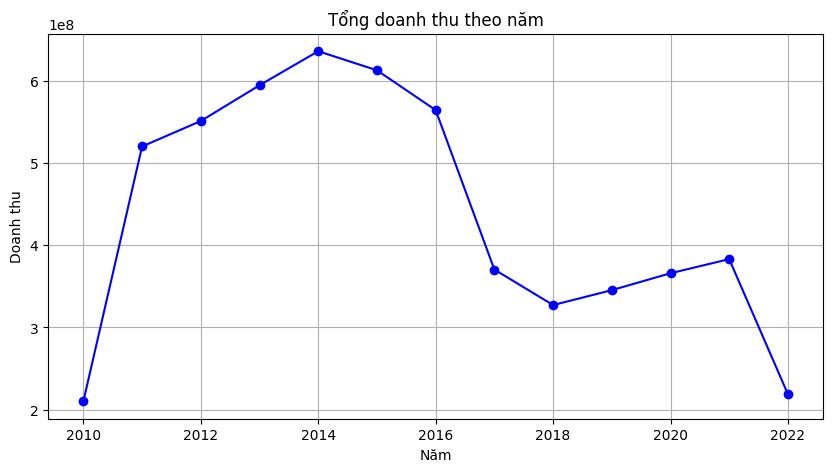

In [188]:
import matplotlib.pyplot as plt

df_yearly = df.groupby("Year")["Revenue"].sum()

plt.figure(figsize=(10, 5))
plt.plot(df_yearly.index, df_yearly.values, marker="o", linestyle="-", color="b")
plt.title("T·ªïng doanh thu theo nƒÉm")
plt.xlabel("NƒÉm")
plt.ylabel("Doanh thu")
plt.grid()
plt.show()


##7.Xu h∆∞·ªõng thay ƒë·ªïi doanh thu, l∆∞·ª£ng b√°n : Xu h∆∞·ªõng tƒÉng tr∆∞·ªüng cao v√†o th√°ng 4 v√† th·∫•p nh·∫•t v√†o th√°ng 12.

In [189]:
# Bi·ªÉu ƒë·ªì 1: Monthly Sales (Doanh thu t·ª´ng th√°ng)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Monthly Sales'
))
fig1.update_layout(
    title="Monthly Sales",
    xaxis_title="Date",
    yaxis_title="Revenue"
)

fig1.show()


In [190]:
# Bi·ªÉu ƒë·ªì 2: Monthly Sales Difference (Ch√™nh l·ªách doanh thu gi·ªØa c√°c th√°ng)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['diff'],
    mode='lines+markers',
    name='Monthly Revenue Difference'
))
fig2.update_layout(
    title="Monthly Sales Difference",
    xaxis_title="Date",
    yaxis_title="Revenue Difference"
)

fig2.show()

##8.Xu h∆∞·ªõng gi√° v√† s·∫£n l∆∞·ª£ng: Gi√° s·∫£n ph·∫©m c√≥ xu h∆∞·ªõng tƒÉng theo th·ªùi gian, s·∫£n l∆∞·ª£ng b√°n ra gi·∫£m d·∫ßn.

### 8.1.S·ª± s·ª•t gi·∫£m b·∫•t th∆∞·ªùng v√†o th√°ng cu·ªëi c√πng: Th√°ng 07/2022 ghi nh·∫≠n m·ª©c gi·∫£m ƒë√°ng k·ªÉ trong s·ªë l∆∞·ª£ng ƒë∆°n v·ªã b√°n ra.









In [191]:
# Gi·∫£ s·ª≠ df l√† DataFrame c·ªßa b·∫°n
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = pd.to_numeric(df['Revenue'])
df['COGS'] = pd.to_numeric(df['COGS'])

# G·ªôp d·ªØ li·ªáu theo th√°ng
df['YearMonth'] = df['Date'].dt.to_period('M')

# Ch·ªâ t√≠nh t·ªïng cho c√°c c·ªôt c·ª• th·ªÉ
df_monthly = df.groupby('YearMonth').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

print(df_monthly)
df_monthly1= df_monthly
df_monthly = df_monthly.drop('YearMonth', axis=1) # axis=1 specifies that we are dropping a column
df_monthly1['Price_per_Unit'] = df_monthly1['Revenue'] / df_monthly1['Units']
plt.figure(figsize=(12, 5))
df_monthly1['YearMonth'] = df_monthly1['YearMonth'].astype(str)



    YearMonth  Units      Revenue         COGS
0     2010-07   7451  36351952.56  28943672.20
1     2010-08   9983  47303856.18  38329232.87
2     2010-09   7303  34881766.29  28370974.40
3     2010-10   6622  32132565.36  26288755.28
4     2010-11   6251  27462497.58  22459930.37
..        ...    ...          ...          ...
140   2022-03   4242  33834812.76  29623220.80
141   2022-04   5880  46567715.67  40824483.42
142   2022-05   5827  46384317.00  40643827.92
143   2022-06   5635  44984175.39  39574064.12
144   2022-07    705   5274388.35   4605905.36

[145 rows x 4 columns]


<Figure size 1200x500 with 0 Axes>

In [192]:
# T·∫°o bi·ªÉu ƒë·ªì v·ªõi Plotly
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Price_per_Unit'],
        mode='lines+markers',
        name='Price per Unit'
    )
]

plot_layout = go.Layout(
    title='Monthly Price per Unit Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Price per Unit',
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)



In [193]:
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Units'],
        mode='lines+markers',
        name='Price per Unit'
    )
]

plot_layout = go.Layout(
    title='Unit Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Unit',

)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


##9.·∫¢nh h∆∞·ªüng c·ªßa COGS v√† s·ªë Unit b√°n ra ƒë·ªëi v·ªõi doanh thu

###9.1.Tr·ªçng s·ªë COGS: 0.988627 vs Tr·ªçng s·ªë Unit: 0.011373

In [194]:
import pandas as pd
import statsmodels.api as sm

df_monthly = df.groupby('YearMonth').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

# X√°c ƒë·ªãnh bi·∫øn ƒë·ªôc l·∫≠p (X) v√† bi·∫øn ph·ª• thu·ªôc (y)
X = df_monthly[['Units', 'COGS']]
y = df_monthly['Revenue']

from sklearn.ensemble import RandomForestRegressor

# Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Hi·ªÉn th·ªã ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


COGS     0.988627
Units    0.011373
dtype: float64


###9.2.Bi√™n ƒë·ªô l·ª£i nhu·∫≠n c√≥ xu h∆∞·ªõng gi·∫£m

In [195]:
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['COGS'],
        mode='lines+markers',
        name='Price per Unit',
        line=dict(color='blue')  # M√†u xanh
    ),
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Revenue'],
        mode='lines+markers',
        name='Revenue',
        line=dict(color='red')  # M√†u ƒë·ªè
    )
]

plot_layout = go.Layout(
    title='COGS and Revenue Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Value',
    legend=dict(x=0, y=1),  # ƒêi·ªÅu ch·ªânh v·ªã tr√≠ ch√∫ th√≠ch
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


# **Data Train-Test**

In [196]:
df_supervised = df_monthly_revenue.drop(['diff'],axis=1)
for inc in range(1,13):
    field_name = 'Revenue_' + str(inc)
    df_supervised[field_name] = df_supervised['Revenue'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)


In [197]:
df_supervised

Year-Month      Revenue    Revenue_1    Revenue_2    Revenue_3  \
0   2011-07-01  54517927.59  57673237.23  56407506.12  60289240.41   
1   2011-08-01  56877280.74  54517927.59  57673237.23  56407506.12   
2   2011-09-01  40379172.12  56877280.74  54517927.59  57673237.23   
3   2011-10-01  32780867.49  40379172.12  56877280.74  54517927.59   
4   2011-11-01  25646847.66  32780867.49  40379172.12  56877280.74   
..         ...          ...          ...          ...          ...   
128 2022-03-01  33834812.76  23949100.98  17959235.49  19926137.70   
129 2022-04-01  46567715.67  33834812.76  23949100.98  17959235.49   
130 2022-05-01  46384317.00  46567715.67  33834812.76  23949100.98   
131 2022-06-01  44984175.39  46384317.00  46567715.67  33834812.76   
132 2022-07-01   5274388.35  44984175.39  46384317.00  46567715.67   

       Revenue_4    Revenue_5    Revenue_6    Revenue_7    Revenue_8  \
0    43099232.40  32564953.89  25395054.30  32303821.41  27462497.58   
1    60289240.41  43099232.40  32564953.89  25395054.30  32303821.41   
2    56407506.12  60289240.41  43099232.40  32564953.89  25395054.30   
3    57673237.23  56407506.12  60289240.41  43099232.40  32564953.89   
4    54517927.59  57673237.23  56407506.12  60289240.41  43099232.40   
..           ...          ...          ...          ...          ...   
128  20693577.24  27373566.78  32441185.98  43491476.70  32444287.47   
129  19926137.70  20693577.24  27373566.78  32441185.98  43491476.70   
130  17959235.49  19926137.70  20693577.24  27373566.78  32441185.98   
131  23949100.98  17959235.49  19926137.70  20693577.24  27373566.78   
132  33834812.76  23949100.98  17959235.49  19926137.70  20693577.24   

       Revenue_9   Revenue_10   Revenue_11   Revenue_12  
0    32132565.36  34881766.29  47303856.18  36351952.56  
1    27462497.58  32132565.36  34881766.29  47303856.18  
2    32303821.41  27462497.58  32132565.36  34881766.29  
3    25395054.30  32303821.41  27462497.58  32132565.36  
4    32564953.89  25395054.30  32303821.41  27462497.58  
..           ...          ...          ...          ...  
128  48282093.72  44448474.42  42042708.54  32252658.48  
129  32444287.47  48282093.72  44448474.42  42042708.54  
130  43491476.70  32444287.47  48282093.72  44448474.42  
131  32441185.98  43491476.70  32444287.47  48282093.72  
132  27373566.78  32441185.98  43491476.70  32444287.47  

[133 rows x 14 columns]

In [198]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_supervised['Month_Index'] = df_supervised['Year-Month'].dt.month - 1
df_model = df_supervised.drop(['Year-Month'],axis=1)

In [199]:
train_set, test_set = df_model[0:-19], df_model[-19:]

train_revenue = train_set.drop(columns=['Month_Index']).values
test_revenue = test_set.drop(columns=['Month_Index']).values

# Chuy·ªÉn Month_Index th√†nh array ri√™ng
train_month = train_set['Month_Index'].values
test_month = test_set['Month_Index'].values

# Chu·∫©n h√≥a doanh thu (Revenue)
scaler = MinMaxScaler(feature_range=(-1, 1))
train_revenue = scaler.fit_transform(train_revenue)
test_revenue = scaler.transform(test_revenue)

X_train, y_train = train_revenue[:, 1:], train_revenue[:, 0:1]
X_test, y_test = test_revenue[:, 1:], test_revenue[:, 0:1]


In [200]:
X_train

array([[ 0.19384725,  0.15937526,  0.26509369, ..., -0.42687493,
        -0.08856123, -0.38683463],
       [ 0.10791288,  0.19384725,  0.15937526, ..., -0.50174899,
        -0.42687493, -0.08856123],
       [ 0.1721695 ,  0.10791288,  0.19384725, ..., -0.62893756,
        -0.50174899, -0.42687493],
       ...,
       [-0.64639392, -0.40227675, -0.52138493, ..., -0.82656819,
        -0.92335639, -0.85090848],
       [-0.75400757, -0.64639392, -0.40227675, ..., -0.90467766,
        -0.82656819, -0.92335639],
       [-0.91585183, -0.75400757, -0.64639392, ..., -0.6861548 ,
        -0.90467766, -0.82656819]])

In [201]:
X_train.shape

(114, 12)

In [202]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [203]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(actual, predicted):
    """
    T√≠nh RMSE gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n.

    Parameters:
    - actual: M·∫£ng ho·∫∑c danh s√°ch ch·ª©a gi√° tr·ªã th·ª±c t·∫ø.
    - predicted: M·∫£ng ho·∫∑c danh s√°ch ch·ª©a gi√° tr·ªã d·ª± ƒëo√°n.

    Returns:
    - RMSE: Gi√° tr·ªã l·ªói RMSE.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse


In [204]:
import numpy as np
from sklearn.metrics import mean_squared_error

def predict_and_inverse_transform(model, X_test, test_month, scaler, train_revenue):
    """
    H√†m th·ª±c hi·ªán d·ª± ƒëo√°n tu·∫ßn t·ª± v·ªõi m√¥ h√¨nh v√† chuy·ªÉn ƒë·ªïi ng∆∞·ª£c gi√° tr·ªã d·ª± ƒëo√°n v·ªÅ ƒë∆°n v·ªã g·ªëc.

    Parameters:
    - model: M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán.
    - X_test: D·ªØ li·ªáu ƒë·∫ßu v√†o ƒë·ªÉ d·ª± ƒëo√°n.
    - test_month: Ch·ªâ s·ªë th√°ng t∆∞∆°ng ·ª©ng v·ªõi X_test.
    - scaler: B·ªô MinMaxScaler ƒë√£ ƒë∆∞·ª£c fit v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán.
    - train_revenue: D·ªØ li·ªáu doanh thu hu·∫•n luy·ªán ƒë·ªÉ x√°c ƒë·ªãnh s·ªë l∆∞·ª£ng features.

    Returns:
    - predictions: Danh s√°ch gi√° tr·ªã d·ª± ƒëo√°n (ƒë√£ scale).
    - predictions_inverted: Danh s√°ch gi√° tr·ªã d·ª± ƒëo√°n sau khi inverse transform.
    """

    predictions = []
    predictions_inverted = []  # Danh s√°ch l∆∞u gi√° tr·ªã ƒë√£ inverse transform
    current_input = X_test[0]  # B·∫Øt ƒë·∫ßu v·ªõi input ƒë·∫ßu ti√™n

    for i in range(len(X_test)):
        # D·ª± ƒëo√°n gi√° tr·ªã ti·∫øp theo
        y_pred = model.predict([test_month[i].reshape(1, 1), current_input.reshape(1, 1, -1)], batch_size=1)
        predictions.append(y_pred[0][0])  # L∆∞u gi√° tr·ªã ƒë√£ scale

        # üîÑ **Inverse transform gi√° tr·ªã d·ª± ƒëo√°n**
        y_pred_inv = scaler.inverse_transform(
            np.concatenate([[[y_pred[0][0]]], np.zeros((1, train_revenue.shape[1] - 1), dtype=np.float32)], axis=1)
        )[:, 0]  # Ch·ªâ l·∫•y c·ªôt doanh thu

        predictions_inverted.append(y_pred_inv[0])  # L∆∞u gi√° tr·ªã g·ªëc

        # C·∫≠p nh·∫≠t input cho b∆∞·ªõc ti·∫øp theo
        current_input = np.roll(current_input, -1).astype(float)
        current_input[0, -1] = float(y_pred[0][0])  # Thay gi√° tr·ªã cu·ªëi c√πng b·∫±ng d·ª± ƒëo√°n hi·ªán t·∫°i (v·∫´n gi·ªØ gi√° tr·ªã scale)

    return np.array(predictions), np.array(predictions_inverted)


In [205]:
import pandas as pd

def create_prediction_dataframe(df_monthly_revenue, pred_test_set_inverted):
    """
    T·∫°o DataFrame ch·ª©a k·∫øt qu·∫£ d·ª± ƒëo√°n v√† gi√° tr·ªã th·ª±c t·∫ø.

    Parameters:
    - df_monthly_revenue: DataFrame ch·ª©a doanh thu th·ª±c t·∫ø theo th√°ng.
    - pred_test_set_inverted: Danh s√°ch c√°c gi√° tr·ªã d·ª± ƒëo√°n ƒë√£ ƒë∆∞·ª£c inverse transform.

    Returns:
    - df_result: DataFrame ch·ª©a c·ªôt 'date', 'pred_value' (d·ª± ƒëo√°n) v√† 'act_value' (th·ª±c t·∫ø).
    """

    # L·∫•y danh s√°ch 20 th√°ng cu·ªëi c√πng t·ª´ c·ªôt 'Year-Month' v√† 'Revenue'
    sales_dates = list(df_monthly_revenue['Year-Month'][-20:])
    act_sales = list(df_monthly_revenue['Revenue'][-19:])  # Th·ª±c t·∫ø ch·ªâ c√≥ 19 gi√° tr·ªã th·ª±c t·∫ø ƒë·ªÉ so s√°nh

    # T·∫°o danh s√°ch k·∫øt qu·∫£ d·ª± ƒëo√°n
    result_list = []
    for index in range(len(pred_test_set_inverted)):
        result_dict = {
            'date': sales_dates[index + 1],  # Ng√†y c·ªßa d·ª± ƒëo√°n (d·ªãch m·ªôt b∆∞·ªõc so v·ªõi th·ª±c t·∫ø)
            'pred_value': int(pred_test_set_inverted[index])  # L√†m tr√≤n v·ªÅ ki·ªÉu int
        }
        result_list.append(result_dict)

    # Chuy·ªÉn sang DataFrame
    df_result = pd.DataFrame(result_list)

    # Th√™m c·ªôt gi√° tr·ªã th·ª±c t·∫ø
    df_result['act_value'] = act_sales

    return df_result


In [206]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyoff

def plot_predictions(df_monthly_revenue, df_result, text='-LSTM'):
    """
    G·ªôp d·ªØ li·ªáu th·ª±c t·∫ø v·ªõi k·∫øt qu·∫£ d·ª± ƒëo√°n, sau ƒë√≥ v·∫Ω bi·ªÉu ƒë·ªì so s√°nh.

    Parameters:
    - df_monthly_revenue: DataFrame ch·ª©a doanh thu th·ª±c t·∫ø theo th√°ng.
    - df_result: DataFrame ch·ª©a d·ª± ƒëo√°n ('date', 'pred_value').

    Returns:
    - fig: ƒê·ªëi t∆∞·ª£ng Figure c·ªßa Plotly ƒë·ªÉ tr·ª±c quan h√≥a k·∫øt qu·∫£.
    """

    # G·ªôp d·ªØ li·ªáu th·ª±c t·∫ø v·ªõi d·ª± ƒëo√°n
    df_sales_pred = pd.merge(df_monthly_revenue, df_result, left_on='Year-Month', right_on='date', how='left')

    # V·∫Ω bi·ªÉu ƒë·ªì so s√°nh gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n
    plot_data = [
        go.Scatter(
            x=df_sales_pred['Year-Month'],
            y=df_sales_pred['Revenue'],
            mode='lines+markers',
            name='Actual Revenue'
        ),
        go.Scatter(
            x=df_sales_pred['Year-Month'],
            y=df_sales_pred['pred_value'],
            mode='lines+markers',
            name='Predicted Revenue'
        )
    ]

    plot_layout = go.Layout(
        title='Monthly Revenue Prediction'+ text ,
        xaxis_title='Year-Month',
        yaxis_title='Revenue',
        legend=dict(x=0, y=1),
    )

    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

    return fig


In [207]:
def forecast_next_12_months_continuous(model, predictions_lstm, test_month, scaler, train_revenue):
    """
    D·ª± b√°o 12 th√°ng ti·∫øp theo b·∫±ng c√°ch d√πng ch√≠nh d·ª± ƒëo√°n LSTM l√†m input.

    Parameters:
    - model: M√¥ h√¨nh LSTM ƒë√£ hu·∫•n luy·ªán.
    - predictions_lstm: D·ª± ƒëo√°n c·ªßa t·∫≠p test.
    - test_month: Ch·ªâ s·ªë th√°ng t∆∞∆°ng ·ª©ng v·ªõi t·∫≠p test (m·∫£ng 1D).
    - scaler: B·ªô MinMaxScaler ƒë√£ ƒë∆∞·ª£c fit.
    - train_revenue: D·ªØ li·ªáu hu·∫•n luy·ªán ƒë·ªÉ x√°c ƒë·ªãnh s·ªë l∆∞·ª£ng features.

    Returns:
    - future_predictions_scaled: D·ª± b√°o ƒë√£ scale.
    - future_predictions_inverted: D·ª± b√°o sau khi inverse transform v·ªÅ ƒë∆°n v·ªã g·ªëc.
    """

    future_predictions_scaled = []
    future_predictions_inverted = []

    # L·∫•y th√°ng cu·ªëi c√πng c·ªßa t·∫≠p test
    last_month = test_month[-1]  # test_month l√† m·∫£ng 1D

    # **L·∫•y 12 th√°ng g·∫ßn nh·∫•t l√†m input ƒë·∫ßu ti√™n (s·ª≠a l·ªói shape)**
    current_input = predictions_lstm[-12:].reshape(1, 1, 12)
    for i in range(12):  # D·ª± ƒëo√°n 12 th√°ng ti·∫øp theo
        last_month = (last_month + 1) % 12  # Gi·ªØ gi√° tr·ªã th√°ng trong kho·∫£ng 0-11

        # D·ª± ƒëo√°n gi√° tr·ªã ti·∫øp theo
        y_pred = model.predict([np.array([[last_month]]), current_input], batch_size=1)
        future_predictions_scaled.append(y_pred[0][0])

        # Inverse transform ƒë·ªÉ ƒë∆∞a v·ªÅ ƒë∆°n v·ªã g·ªëc
        y_pred_inv = scaler.inverse_transform(
            np.concatenate([[[y_pred[0][0]]], np.zeros((1, train_revenue.shape[1] - 1), dtype=np.float32)], axis=1)
        )[:, 0]

        future_predictions_inverted.append(y_pred_inv[0])

        # **C·∫≠p nh·∫≠t input b·∫±ng c√°ch lo·∫°i b·ªè gi√° tr·ªã c≈© nh·∫•t v√† th√™m gi√° tr·ªã m·ªõi nh·∫•t**
        current_input = np.roll(current_input, -1, axis=2)
        current_input[0, 0, -1] = float(y_pred[0][0])

    return np.array(future_predictions_scaled), np.array(future_predictions_inverted)


# **LSTM**

##M√¥ h√¨nh

In [208]:
import numpy as np
import random
import tensorflow as tf

# ƒê·∫∑t random seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from tensorflow.keras.layers import Embedding, Add, Flatten, Reshape, LSTM, Dense, Lambda
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Input ri√™ng bi·ªát cho Month_Index v√† Revenue
input_month = Input(batch_shape=(1, 1))
input_revenue = Input(shape=(1, X_train.shape[2]))
# L·ªõp Embedding cho Month_Index
embedding = Embedding(input_dim=12, output_dim=12)(input_month)
embedding = tf.keras.activations.tanh(embedding)
embedding_reshaped = Reshape((1, 12))(embedding)

# Th·ª±c hi·ªán ph√©p c·ªông (Add)
added = Add()([input_revenue, embedding_reshaped])

# ƒê∆∞a v√†o LSTM
lstm_out = LSTM(64, stateful=True)(added)
output = Dense(1)(lstm_out)

# X√¢y d·ª±ng m√¥ h√¨nh
model_lstm = Model(inputs=[input_month, input_revenue], outputs=output)

import tensorflow.keras.backend as K

def smape_loss(y_true, y_pred):
    """
    T√≠nh SMAPE loss (Symmetric Mean Absolute Percentage Error).
    SMAPE = (2 / n) * sum(|y_true - y_pred| / (|y_true| + |y_pred| + epsilon))
    """
    numerator = K.abs(y_true - y_pred)
    denominator = (K.abs(y_true) + K.abs(y_pred)) / 2.0 + K.epsilon()
    return K.mean(numerator / denominator)

def custom_loss(y_true, y_pred):
    """
    H√†m loss k·∫øt h·ª£p gi·ªØa MSE v√† SMAPE.
    """
    mse = K.mean(K.square(y_true - y_pred))
    smape = smape_loss(y_true, y_pred)
    return mse + 0.2 * smape

model_lstm.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.004))

# Hu·∫•n luy·ªán
model_lstm.fit(
    [train_month.reshape(-1, 1), X_train],
    y_train,
    epochs=150,
    batch_size=1,
    verbose=1,
    shuffle=False
)


Epoch 1/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 3ms/step - loss: 0.3878
Epoch 2/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.2224
Epoch 3/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.2241
Epoch 4/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.1974
Epoch 5/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1744
Epoch 6/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1571
Epoch 7/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1555
Epoch 8/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.1432
Epoch 9/150
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.1391
Epoch 10/150
114/114 ‚îÅ‚îÅ‚

##D·ª± ƒëo√°n v√† ƒê√°nh gi√°

In [209]:
predictions_lstm, predictions_inverted_lstm = predict_and_inverse_transform(model_lstm, X_test, test_month, scaler, train_revenue)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 221ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [210]:
df_result_lstm = create_prediction_dataframe(df_monthly_revenue,  predictions_inverted_lstm)


In [211]:
df_result_lstm

date  pred_value    act_value
0  2021-01-01    16674600  17404126.74
1  2021-02-01    24443894  22244195.61
2  2021-03-01    33599024  32252658.48
3  2021-04-01    36499036  42042708.54
4  2021-05-01    44215948  44448474.42
5  2021-06-01    43659036  48282093.72
6  2021-07-01    33155288  32444287.47
7  2021-08-01    43608608  43491476.70
8  2021-09-01    25988832  32441185.98
9  2021-10-01    24742930  27373566.78
10 2021-11-01    18785196  20693577.24
11 2021-12-01    20248388  19926137.70
12 2022-01-01    16269700  17959235.49
13 2022-02-01    31517620  23949100.98
14 2022-03-01    38020164  33834812.76
15 2022-04-01    48057056  46567715.67
16 2022-05-01    46541324  46384317.00
17 2022-06-01    44143444  44984175.39
18 2022-07-01    28030126   5274388.35

In [212]:
fig_lstm = plot_predictions(df_monthly_revenue, df_result_lstm, text='-LSTM')


In [213]:
print('Root Mean Squared Error:',calculate_rmse(df_result_lstm['act_value'], df_result_lstm['pred_value']))

Root Mean Squared Error: 6115502.874301662


In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(df_result_lstm['act_value'], df_result_lstm['pred_value']))
mae = mean_absolute_error(df_result_lstm['act_value'], df_result_lstm['pred_value'])
mape = np.mean(np.abs((df_result_lstm['act_value']-df_result_lstm['pred_value']) / df_result_lstm['act_value'])) * 100
r2 = r2_score(df_result_lstm['act_value'], df_result_lstm['pred_value'])

print(f'''
ƒê√°nh gi√° m√¥ h√¨nh cho LSTM:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R¬≤: {r2:.2f}
''')


ƒê√°nh gi√° m√¥ h√¨nh cho LSTM:
- RMSE: 6115502.87
- MAE: 3447517.03
- MAPE: 30.24%
- R¬≤: 0.75



##D·ª± ƒëo√°n doanh thu m·ªôt nƒÉm sau

In [215]:
future_predictions_lstm, future_predictions_inverted_lstm = forecast_next_12_months_continuous(
    model_lstm, predictions_lstm, test_month, scaler, train_revenue
)

df_future_lstm = pd.DataFrame({
    'date': pd.date_range(start=df_result_lstm['date'].iloc[-1], periods=13, freq='ME')[1:],  # T·∫°o 12 th√°ng ti·∫øp theo
    'pred_value': future_predictions_inverted_lstm
})

df_full_result_lstm = pd.concat([df_result_lstm, df_future_lstm], ignore_index=True)



trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

trace_pred_lstm = go.Scatter(
    x=df_full_result_lstm['date'],
    y=df_full_result_lstm['pred_value'],
    mode='lines+markers',
    name='Predicted Revenue'
)

plot_layout_lstm= go.Layout(
    title='Revenue Prediction (Including Future 12 Months)- LSTM',
    xaxis_title='Year-Month',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)
fig_lstm = go.Figure(data=[trace_actual, trace_pred_lstm], layout=plot_layout_lstm)
pyoff.iplot(fig_lstm)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 248ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 77ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 68ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 82ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 75ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 70ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 67ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 70ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step


# **Transformer**

##M√¥ h√¨nh

In [216]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.layers import (Embedding, Dense, Reshape, Add, MultiHeadAttention,
                                     LayerNormalization, Dropout, Input, Flatten)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ƒê·∫∑t random seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Input cho Month_Index v√† Revenue
input_month = Input(shape=(1,))
input_revenue = Input(shape=(1, X_train.shape[2]))

# L·ªõp Embedding cho Month_Index
embedding = Embedding(input_dim=12, output_dim=12)(input_month)
norm_layer = LayerNormalization()(embedding)
embedding_reshaped = Reshape((1, 12))(norm_layer)

# K·∫øt h·ª£p input v·ªõi embedding
added = Add()([input_revenue, embedding_reshaped])

# Transformer Block
def transformer_block(inputs, num_heads=8, ff_dim=32, dropout_rate=0.1):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    ff_output = Dense(ff_dim, activation='gelu')(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    return LayerNormalization(epsilon=1e-6)(attention_output + ff_output)

# √Åp d·ª•ng Transformer block
transformer_out = transformer_block(added)

# Dense Layer ƒë·ªÉ l·∫•y ƒë·∫ßu ra
output = Dense(1)(Flatten()(transformer_out))

# X√¢y d·ª±ng m√¥ h√¨nh
model_transformer = Model(inputs=[input_month, input_revenue], outputs=output)
model_transformer.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.001))

# Hu·∫•n luy·ªán
model_transformer.fit(
    [train_month.reshape(-1, 1), X_train],
    y_train,
    epochs=500,
    batch_size=1,
    verbose=1,
    shuffle=False
)

Epoch 1/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - loss: 2.4467
Epoch 2/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.4274
Epoch 3/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.3220
Epoch 4/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.2710
Epoch 5/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.3104
Epoch 6/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.2338
Epoch 7/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.2153
Epoch 8/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.2087
Epoch 9/500
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.2314
Epoch 10/500
114/114 ‚îÅ‚îÅ‚

##D·ª± ƒëo√°n v√† ƒë√°nh gi√°

In [217]:
predictions_trans, predictions_inverted_trans = predict_and_inverse_transform(model_transformer, X_test, test_month, scaler, train_revenue)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 271ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [218]:
df_result_trans = create_prediction_dataframe(df_monthly_revenue,  predictions_inverted_trans)

In [219]:
df_result_trans

date  pred_value    act_value
0  2021-01-01    14554339  17404126.74
1  2021-02-01    22830122  22244195.61
2  2021-03-01    32257088  32252658.48
3  2021-04-01    47708236  42042708.54
4  2021-05-01    42013892  44448474.42
5  2021-06-01    46889056  48282093.72
6  2021-07-01    30560524  32444287.47
7  2021-08-01    40072800  43491476.70
8  2021-09-01    27825014  32441185.98
9  2021-10-01    26716650  27373566.78
10 2021-11-01    19147936  20693577.24
11 2021-12-01    19862886  19926137.70
12 2022-01-01    19518986  17959235.49
13 2022-02-01    28355964  23949100.98
14 2022-03-01    41582660  33834812.76
15 2022-04-01    52382256  46567715.67
16 2022-05-01    40914004  46384317.00
17 2022-06-01    43799192  44984175.39
18 2022-07-01    29057140   5274388.35

In [220]:
fig_trans = plot_predictions(df_monthly_revenue, df_result_trans,text='-Transformer')


In [221]:
print('Root Mean Squared Error:',calculate_rmse(df_result_trans['act_value'], df_result_trans['pred_value']))

Root Mean Squared Error: 6490637.541529246


In [222]:
rmse = np.sqrt(mean_squared_error(df_result_trans['act_value'], df_result_trans['pred_value']))
mae = mean_absolute_error(df_result_trans['act_value'], df_result_trans['pred_value'])
mape = np.mean(np.abs((df_result_trans['act_value']-df_result_trans['pred_value']) / df_result_trans['act_value'])) * 100
r2 = r2_score(df_result_trans['act_value'], df_result_trans['pred_value'])


print(f'''
ƒê√°nh gi√° m√¥ h√¨nh cho Transformer:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R¬≤: {r2:.2f}
''')


ƒê√°nh gi√° m√¥ h√¨nh cho Transformer:
- RMSE: 6490637.54
- MAE: 3951829.59
- MAPE: 31.93%
- R¬≤: 0.72



##D·ª± ƒëo√°n doanh thu m·ªôt nƒÉm sau

In [223]:
future_predictions_trans, future_predictions_inverted_trans = forecast_next_12_months_continuous(
    model_transformer, predictions_trans, test_month, scaler, train_revenue
)

df_future_trans = pd.DataFrame({
    'date': pd.date_range(start=df_result_trans['date'].iloc[-1], periods=13, freq='ME')[1:],  # T·∫°o 12 th√°ng ti·∫øp theo
    'pred_value': future_predictions_inverted_trans
})

df_full_result_trans = pd.concat([df_result_trans, df_future_trans], ignore_index=True)

# V·∫Ω d·ªØ li·ªáu th·ª±c t·∫ø
trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

# V·∫Ω d·ª± ƒëo√°n hi·ªán t·∫°i
trace_pred_trans = go.Scatter(
    x=df_full_result_trans['date'],
    y=df_full_result_trans['pred_value'],
    mode='lines+markers',
    name='Predicted Revenue'
)


# Thi·∫øt l·∫≠p layout
plot_layout_trans = go.Layout(
    title='Revenue Prediction (Including Future 12 Months)-Transformer',
    xaxis_title='Year-Month',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)

# T·∫°o Figure v√† v·∫Ω
fig_trans = go.Figure(data=[trace_actual, trace_pred_trans], layout=plot_layout_trans)
pyoff.iplot(fig_trans)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 254ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step


# **SARIMA**

In [224]:
!pip install pmdarima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [225]:
def adf_test(series, title=''):
    print(f'ADF Test cho {title}')
    try:
        result = adfuller(series.dropna())
        labels = ['ADF Statistic', 'p-value', '#Lags', 'S·ªë quan s√°t']
        out = pd.Series(result[0:4], index=labels)

        for key, val in result[4].items():
            out[f'Critical Value ({key})'] = val

        print(out.to_string())
        print('K·∫øt lu·∫≠n: D·ªØ li·ªáu {} d·ª´ng\n'.format('KH√îNG' if result[1] > 0.05 else ''))
        return result[1]
    except Exception as e:
        print(f"L·ªói khi th·ª±c hi·ªán ADF test: {e}")
        return None
# Ch·∫°y h√†m
adf_test(df_monthly_revenue['Revenue'])

ADF Test cho 
ADF Statistic            -0.440097
p-value                   0.903186
#Lags                    12.000000
S·ªë quan s√°t             132.000000
Critical Value (1%)      -3.480888
Critical Value (5%)      -2.883697
Critical Value (10%)     -2.578586
K·∫øt lu·∫≠n: D·ªØ li·ªáu KH√îNG d·ª´ng



0.9031856181446483

In [226]:
def make_stationary(series, max_diff=2):
    print(f"\nX·ª≠ l√Ω l√†m d·ª´ng cho {series.name}:")
    original_series = series.copy()

    for d in range(1, max_diff+1):
        diff = original_series.diff(d).dropna()
        p_value = adf_test(diff, f'Sai ph√¢n b·∫≠c {d}')
        if p_value is not None and p_value < 0.05:
            print(f"ƒê√£ ƒë·∫°t t√≠nh d·ª´ng v·ªõi sai ph√¢n b·∫≠c {d}")
            return diff, d

    print("Kh√¥ng th·ªÉ l√†m d·ª´ng v·ªõi sai ph√¢n <= 2")
    return original_series, 0

revenue_diff, d_revenue = make_stationary(df_monthly_revenue['Revenue'])


X·ª≠ l√Ω l√†m d·ª´ng cho Revenue:
ADF Test cho Sai ph√¢n b·∫≠c 1
ADF Statistic            -4.000802
p-value                   0.001406
#Lags                    11.000000
S·ªë quan s√°t             132.000000
Critical Value (1%)      -3.480888
Critical Value (5%)      -2.883697
Critical Value (10%)     -2.578586
K·∫øt lu·∫≠n: D·ªØ li·ªáu  d·ª´ng

ƒê√£ ƒë·∫°t t√≠nh d·ª´ng v·ªõi sai ph√¢n b·∫≠c 1


Ph√¢n t√≠ch ACF/PACF cho doanh thu:


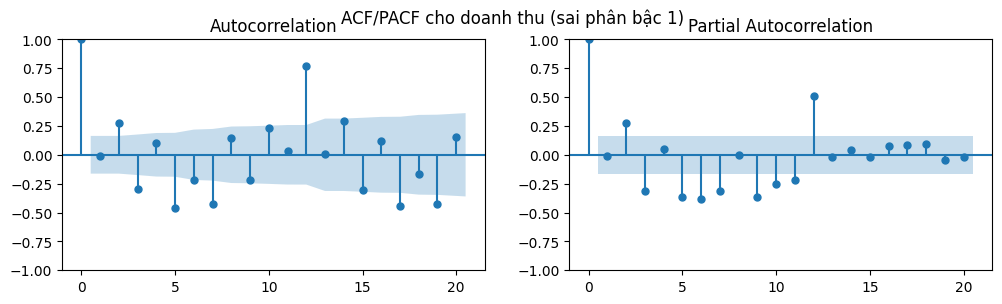

In [227]:
# 5. X√°c ƒë·ªãnh tham s·ªë ARIMA qua ACF/PACF (gi·ªõi h·∫°n l·∫°i s·ªë l∆∞·ª£ng lag)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_correlations(series, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    lags = min(20, len(series)//2 - 1)
    plot_acf(series, ax=axes[0], lags=lags)
    plot_pacf(series, ax=axes[1], lags=lags, method='ywm')
    fig.suptitle(title)
    plt.show()

print("Ph√¢n t√≠ch ACF/PACF cho doanh thu:")
plot_correlations(revenue_diff, 'ACF/PACF cho doanh thu (sai ph√¢n b·∫≠c 1)')

In [228]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3Ô∏è‚É£ T√¨m tham s·ªë t·ªët nh·∫•t cho SARIMA
def find_best_sarima(series):
    try:
        model = auto_arima(
            series,
            seasonal=True,        # B·∫≠t ch·∫ø ƒë·ªô th·ªùi v·ª•
            m=12,                 # Chu k·ª≥ m√πa v·ª• (12 th√°ng)
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_order=8,
            max_p=3, max_q=3,      # Gi·ªõi h·∫°n tham s·ªë AR v√† MA
            max_P=2, max_Q=2,      # Gi·ªõi h·∫°n tham s·ªë AR v√† MA theo m√πa v·ª•
            information_criterion='aic',
            trace=True  # Hi·ªÉn th·ªã qu√° tr√¨nh t√¨m ki·∫øm
        )
        print(model.summary())
        return model.order, model.seasonal_order
    except Exception as e:
        print(f"L·ªói khi t√¨m SARIMA: {e}")
        return (0, 0, 0), (0, 0, 0, 0)

# T√¨m tham s·ªë t·ªëi ∆∞u
best_order, best_seasonal_order = find_best_sarima(df_monthly_revenue['Revenue'][:-19])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4340.180, Time=3.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4419.467, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4350.753, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4370.345, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4417.488, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4354.978, Time=0.57 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4338.549, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=4392.074, Time=0.23 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4340.217, Time=1.50 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=4342.178, Time=2.23 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=4339.644, Time=0.36 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=4338.857, Time=0.34 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=4336.995, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=4376.693, Time=0.24 sec
 ARIMA(3,1,2)(2,0,0

In [229]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_sarima(series, order, seasonal_order, var_name, test_size=19):
    try:
        # Chia d·ªØ li·ªáu train/test
        train = series[:-test_size]
        test = series[-test_size:]

        # Hu·∫•n luy·ªán m√¥ h√¨nh SARIMA
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # D·ª± b√°o
        forecast = model_fit.get_forecast(steps=test_size).predicted_mean

        # Ki·ªÉm tra d·ª± b√°o c√≥ NaN kh√¥ng
        if forecast.isna().sum() > 0:
            raise ValueError("D·ª± b√°o ch·ª©a gi√° tr·ªã NaN, c·∫ßn ki·ªÉm tra d·ªØ li·ªáu ƒë·∫ßu v√†o ho·∫∑c ƒëi·ªÅu ch·ªânh m√¥ h√¨nh.")

        # ƒê√°nh gi√° k·∫øt qu·∫£
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)
        mape = np.mean(np.abs((test - forecast) / test)) * 100
        r2 = r2_score(test, forecast)

        # Chu·∫©n b·ªã dataframe k·∫øt qu·∫£ d·ª± b√°o
        df_result = pd.DataFrame({'date': test.index, 'pred_value': forecast.values})

        # V·∫Ω bi·ªÉu ƒë·ªì so s√°nh th·ª±c t·∫ø & d·ª± b√°o
        plot_predictions(pd.DataFrame({'Year-Month': series.index, 'Revenue': series.values}), df_result, text='-SARIMA')

        print(f'''
ƒê√°nh gi√° m√¥ h√¨nh SARIMA cho {var_name}:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R¬≤: {r2:.2f}
''')

        return model_fit

    except Exception as e:
        print(f"L·ªói khi ƒë√°nh gi√° m√¥ h√¨nh: {e}")
        return None

# ƒê√°nh gi√° m√¥ h√¨nh SARIMA
model_sarima = evaluate_sarima(df_monthly_revenue['Revenue'], best_order, best_seasonal_order, 'Doanh thu')



ƒê√°nh gi√° m√¥ h√¨nh SARIMA cho Doanh thu:
- RMSE: 7328170.25
- MAE: 4789681.21
- MAPE: 36.10%
- R¬≤: 0.64



In [230]:
import plotly.graph_objs as go
import plotly.offline as pyoff

# X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng ƒëi·ªÉm d·ªØ li·ªáu
test_size = 19
future_size = 12

# D·ª± b√°o cho c·∫£ test + future
forecast_total = model_sarima.get_forecast(steps=test_size + future_size).predicted_mean

# T√°ch d·ªØ li·ªáu d·ª± b√°o
forecast_test = forecast_total[:test_size]  # Ph·∫ßn d·ª± b√°o t·∫≠p test
forecast_future = forecast_total[test_size:]  # Ph·∫ßn d·ª± b√°o t∆∞∆°ng lai

# Ch·ªâ s·ªë th·ªùi gian
# Gi·∫£ s·ª≠ df_monthly_revenue c√≥ c·ªôt 'Year-Month' d·∫°ng datetime
test_dates = df_monthly_revenue['Year-Month'][-test_size:]  # Ng√†y c·ªßa t·∫≠p test

# X√°c ƒë·ªãnh ng√†y cu·ªëi c√πng trong test
last_test_date = test_dates.iloc[-1]

# T·∫°o future_dates v·ªõi t·∫ßn su·∫•t h√†ng th√°ng ('M')
future_dates = pd.date_range(start=last_test_date, periods=future_size + 1, freq='M')[1:]

total_dates = pd.concat([pd.Series(test_dates), pd.Series(future_dates)]).reset_index(drop=True)

# V·∫Ω bi·ªÉu ƒë·ªì
trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

trace_pred_future = go.Scatter(
    x=total_dates,
    y=forecast_total.values,
    mode='lines+markers',
    name='Predicted',
)

layout = go.Layout(
    title='Revenue Prediction (Including Future 12 Months)-SARIMA',
    xaxis_title='Date',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_actual, trace_pred_future], layout=layout)
pyoff.iplot(fig)



Ph√¢n t√≠ch ph·∫ßn d∆∞ cho Doanh thu:
count    1.260000e+02
mean    -8.751574e+04
std      7.429590e+06
min     -2.006621e+07
25%     -3.746472e+06
50%      6.807617e+04
75%      3.413714e+06
max      3.635195e+07
dtype: float64


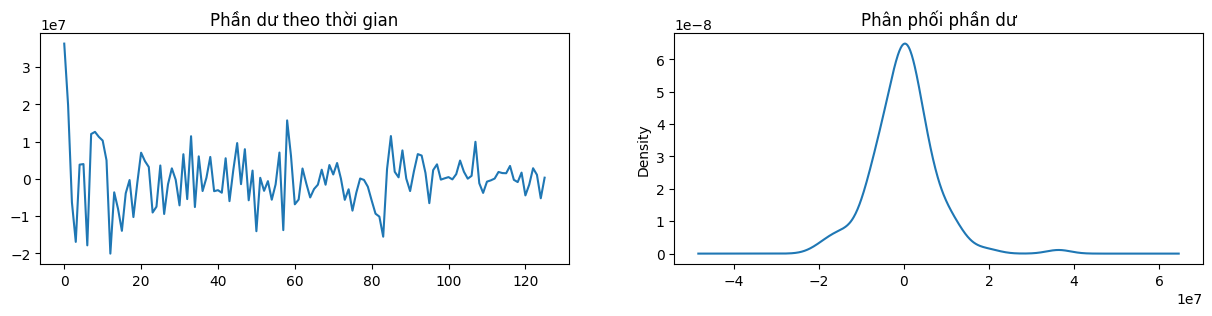

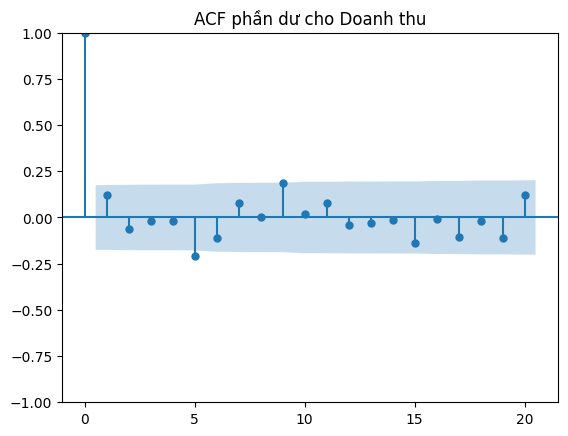

In [231]:
# 9. Ph√¢n t√≠ch ph·∫ßn d∆∞
def analyze_residuals(model_fit, title):
    residuals = pd.Series(model_fit.resid, index=model_fit.model.data.row_labels)

    # Th·ªëng k√™ ph·∫ßn d∆∞
    print(f"\nPh√¢n t√≠ch ph·∫ßn d∆∞ cho {title}:")
    print(residuals.describe())

    # Bi·ªÉu ƒë·ªì ph·∫ßn d∆∞
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    residuals.plot(title='Ph·∫ßn d∆∞ theo th·ªùi gian', ax=axes[0])
    residuals.plot(kind='kde', title='Ph√¢n ph·ªëi ph·∫ßn d∆∞', ax=axes[1])
    plt.show()

    # ACF c·ªßa ph·∫ßn d∆∞
    plot_acf(residuals, lags=20)
    plt.title(f'ACF ph·∫ßn d∆∞ cho {title}')
    plt.show()

analyze_residuals(model_sarima, 'Doanh thu')